# YOLO Model Training for Cell Detection

This Jupyter notebook sets up and trains a YOLOv8 model for detecting cells in microscope images.

## Overview

This notebook performs the following key tasks:
1. Sets up the environment for YOLO model training
2. Installs and upgrades necessary packages
3. Loads a pre-configured YOLO model
4. Trains the model on a custom cell dataset

## Key Components

1. **Environment Setup**: 
   - Installs or upgrades the `ultralytics` package
   - Performs environment checks to ensure compatibility

2. **Model Initialization**:
   - Loads a small YOLOv8 model configuration (`yolov8s.yaml`)

3. **Data Configuration**:
   - Uses a custom dataset located in Google Drive
   - Configures the dataset using a YAML file

4. **Model Training**:
   - Trains the model for 100 epochs
   - Uses images of size 960x960 pixels
   - Saves the trained model
   - Uses a batch size of 4 (adjust as needed)

## Dataset

The dataset is expected to be structured according to the YOLO format, with a `dataset.yaml` file specifying the paths to images and labels.

For detailed information on how to prepare and structure your dataset YAML file, refer to the official YOLO documentation:
https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#13-prepare-dataset-for-yolov5

In [ ]:
'''
- This code snippet sets up the environment for using the YOLO (You Only Look Once) model 
- It installs or upgrades the ultralytics package and performs environment checks 
'''

import os
!pip install --upgrade ultralytics

from IPython import display
from IPython.display import Image
display.clear_output()

import ultralytics
from ultralytics import YOLO
ultralytics.checks()


Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/107.7 GB disk)


In [ ]:
# Configuration for YOLO model training
# TODO: Modify these paths to match your local or cloud storage setup
Data_DIR = '/content/drive/My Drive/cellDataset'
yamlPath = '/content/drive/My Drive/cellDataset/dataset.yaml'

# Initialize YOLO model
model = ultralytics.YOLO('yolov8s.yaml')

# Train the model
# TODO: Adjust hyperparameters as needed for your specific use case
# Refer to https://docs.ultralytics.com/guides/hyperparameter-tuning/ for more details
model.train(
    data=yamlPath,
    epochs=100,
    imgsz=960,
    save=True,
    batch=4,
    
)


0: 960x960 16 WBCs, 1592.4ms
1: 960x960 19 WBCs, 1592.4ms
2: 960x960 29 WBCs, 1592.4ms
3: 960x960 12 WBCs, 1592.4ms
4: 960x960 11 WBCs, 1592.4ms
5: 960x960 12 WBCs, 1592.4ms
6: 960x960 34 WBCs, 1592.4ms
7: 960x960 12 WBCs, 1592.4ms
8: 960x960 34 WBCs, 1592.4ms
9: 960x960 9 WBCs, 1592.4ms
10: 960x960 26 WBCs, 1592.4ms
11: 960x960 20 WBCs, 1592.4ms
Speed: 7.0ms preprocess, 1592.4ms inference, 0.9ms postprocess per image at shape (1, 3, 960, 960)


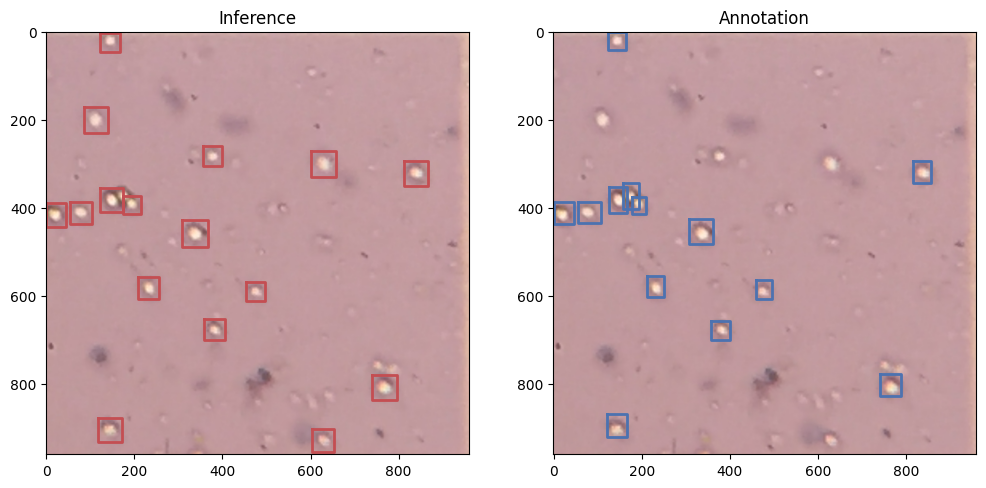

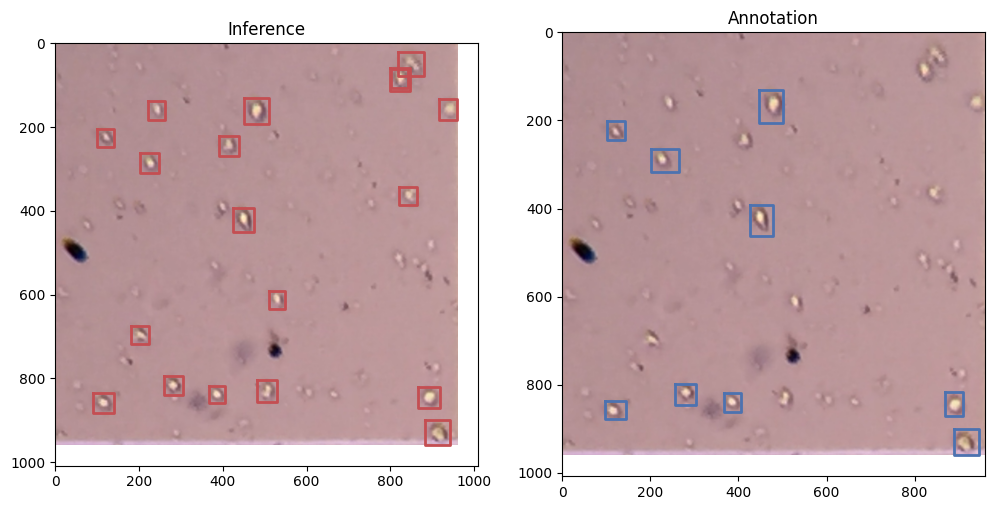

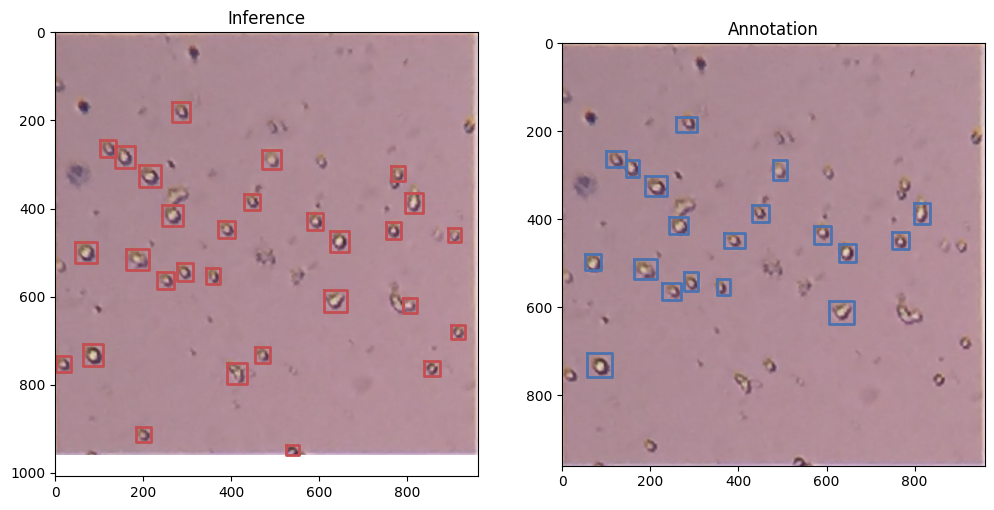

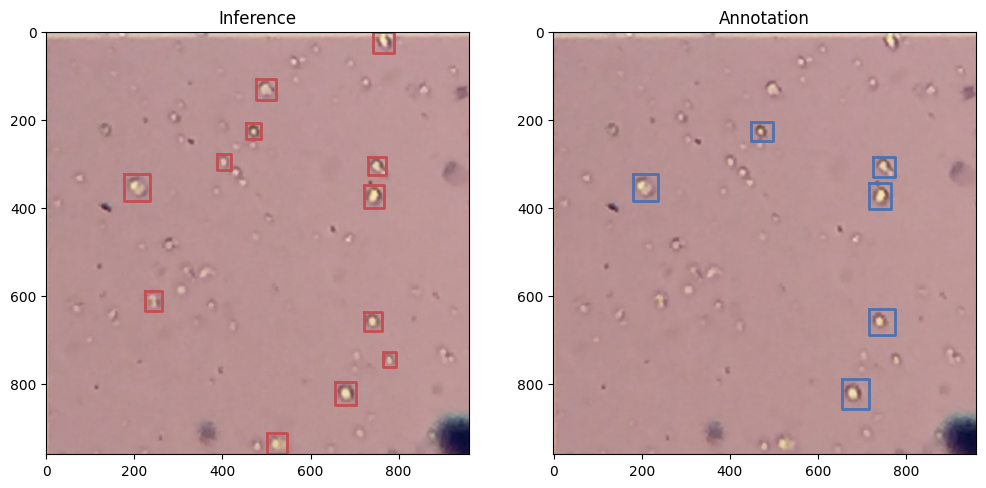

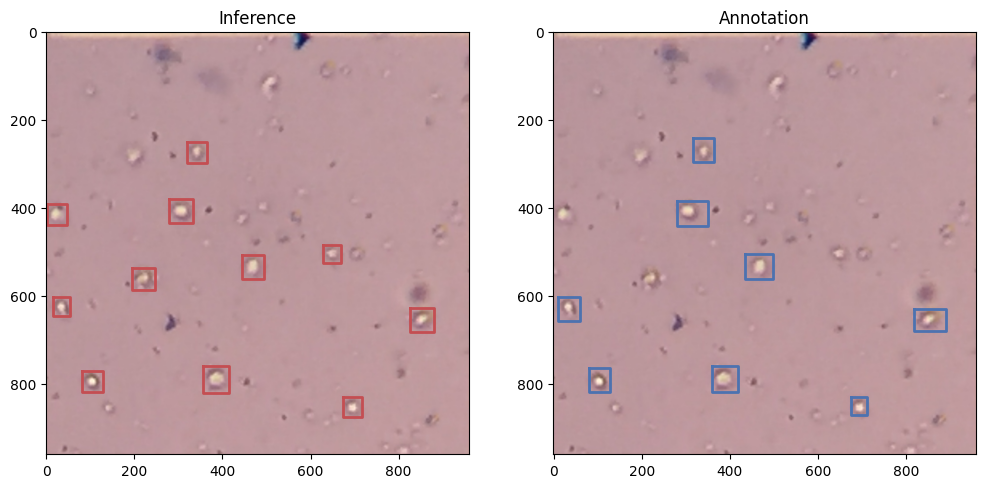

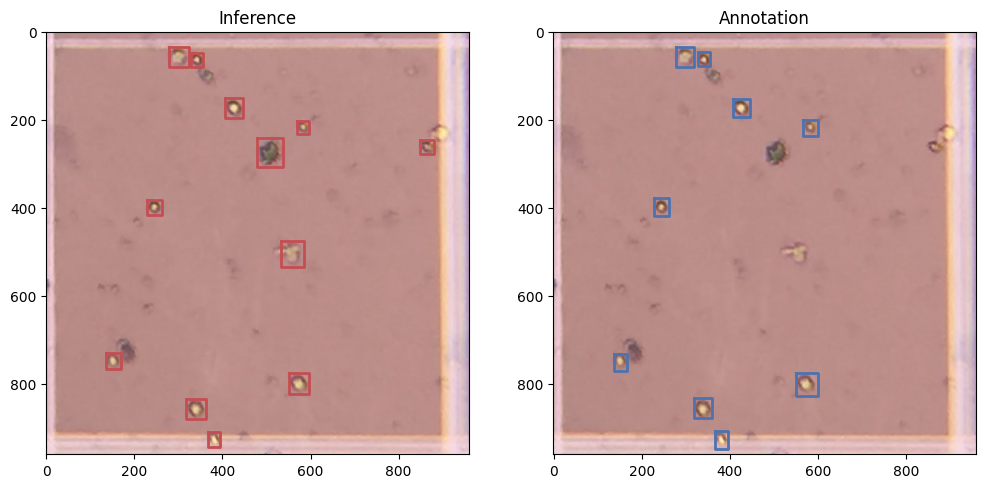

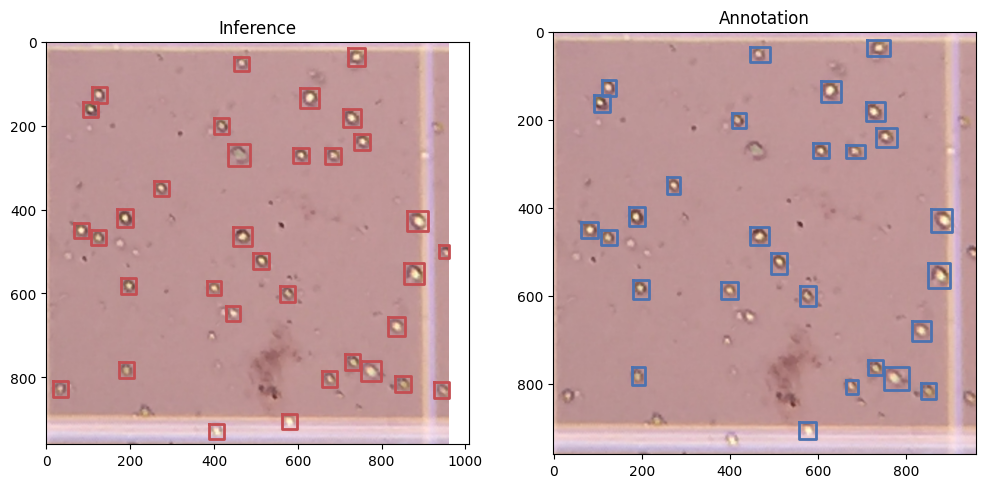

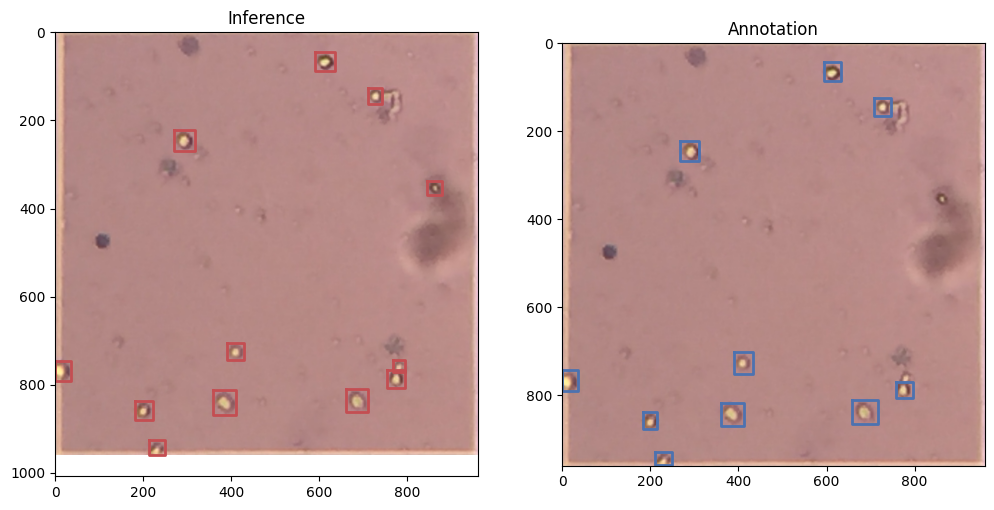

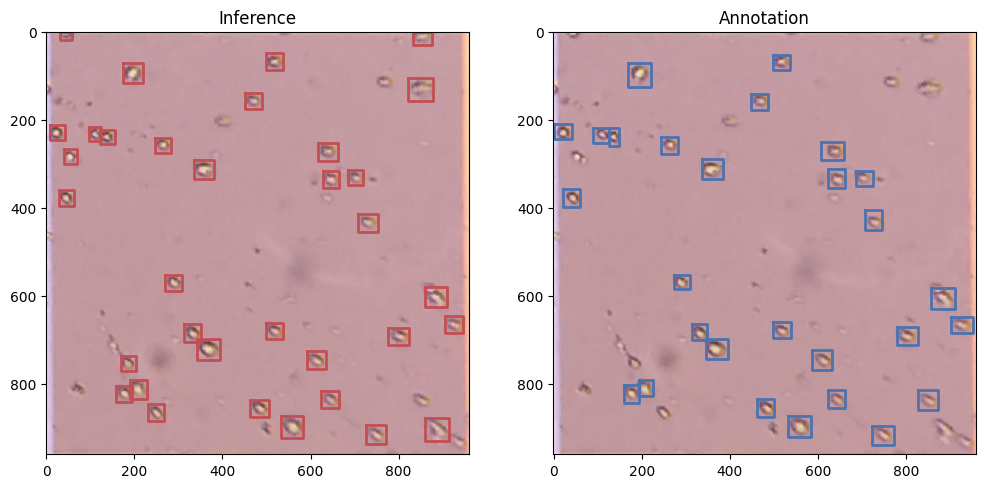

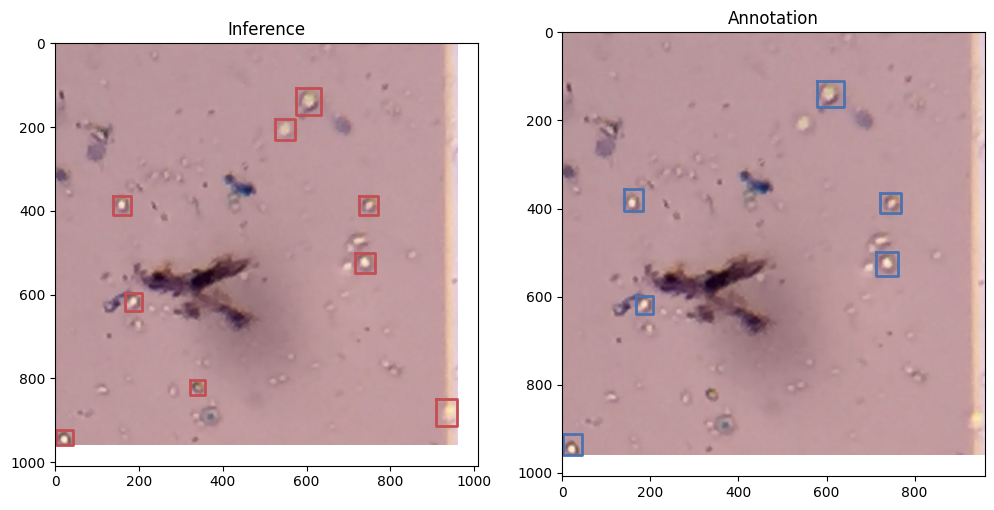

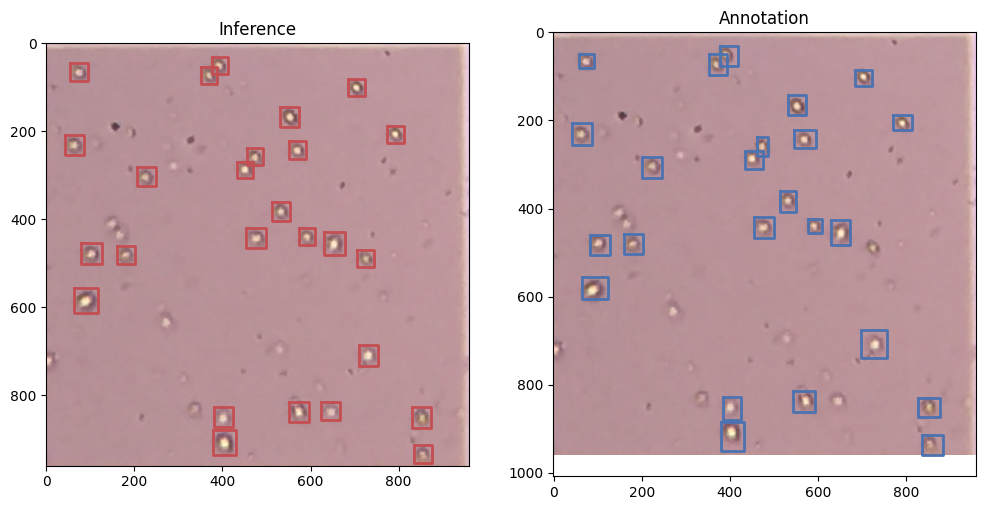

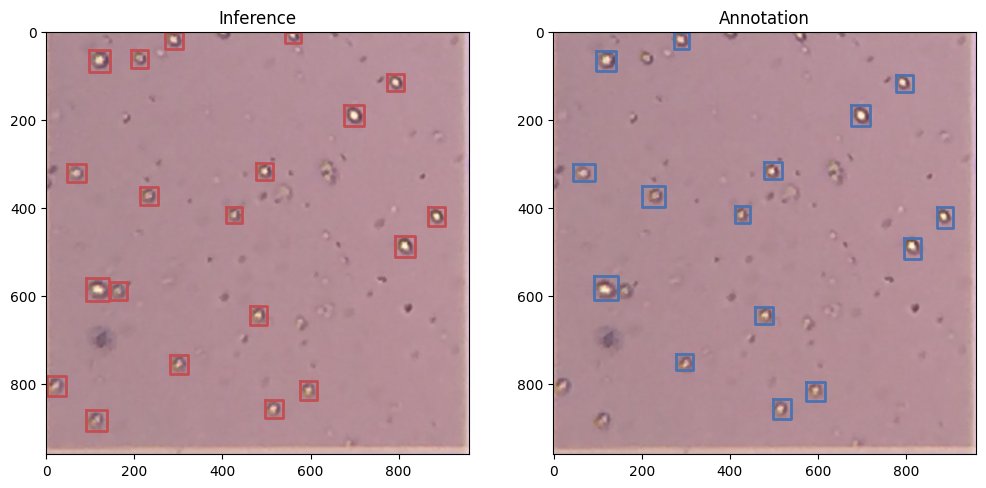

In [ ]:
import os
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import patches
import ultralytics

# Path to the image directory
image_dir = '/content/drive/My Drive/cellDataset/images/val'

# Path to the annotations directory
annotation_dir = '/content/drive/My Drive/cellDataset/labels/val'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

images = []
for image in image_files:
    image_path = os.path.join(image_dir, image)
    images.append(image_path)

# Load a model
model = ultralytics.YOLO("/content/runs/detect/train/weights/best.pt")

# Run batched inference on a list of images
results = model(images)

# Process results generator
index = 0

for result, image_path in zip(results, images):
    boxes = result.boxes.xyxy
    img_np = result.orig_img
    img = Image.fromarray(img_np)

    # Load the original image
    original_img = Image.open(image_path)

    # Create a subplot with three axes
    fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(12, 6))

    # Display the inference image on the left
    #ax1.imshow(img)
    #ax1.set_title("Inference")

    # Display the original image in the middle
    ax2.imshow(original_img)
    ax2.set_title("Inference")

    # Display the original image on the right with ground truth
    ax3.imshow(original_img)
    ax3.set_title("Annotation")

    # Add bounding boxes to BOTH images
    for box in boxes:
        x1, y1, x2, y2 = box.tolist()
        #ax1.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], 'r', linewidth=2)
        ax2.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], 'r', linewidth=2)

    # Load ground truth annotations
    annotation_file = os.path.join(annotation_dir, os.path.splitext(os.path.basename(image_path))[0] + '.txt')
    with open(annotation_file, 'r') as f:
        annotations = f.readlines()

    for annotation in annotations:
        parts = annotation.strip().split()
        class_id, x_center, y_center, width, height = [float(part) for part in parts]

        # Convert to xyxy format
        x1 = (x_center - width / 2) * original_img.width
        y1 = (y_center - height / 2) * original_img.height
        x2 = (x_center + width / 2) * original_img.width
        y2 = (y_center + height / 2) * original_img.height

        ax3.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], 'b', linewidth=2) # Blue for ground truth

    plt.show()
    index += 1